# Entregável H03 - Análise Espectral de Áudio

__Primeiro, vamos analisar o espectro de dois arquivos de áudio (Flauta.wav e Violino.wav) no ambiente Matlab:__

In [1]:
clc; close all;clear all;   
%%  Abertura dos arquivos de audio
soundFile = ['../../DCO2004_2019/MATERIAL/HD_03_MATLAB/Flauta.wav'];             % Especifica do local e nome do arquivo de áudio
[vtSom, dFa] = audioread(soundFile);                              % Abre arquivo de áudio de um arquivo
soundFile1 =['../../DCO2004_2019/MATERIAL/HD_03_MATLAB/Violino.wav'];
[vtSom1,dFa1] = audioread(soundFile1);

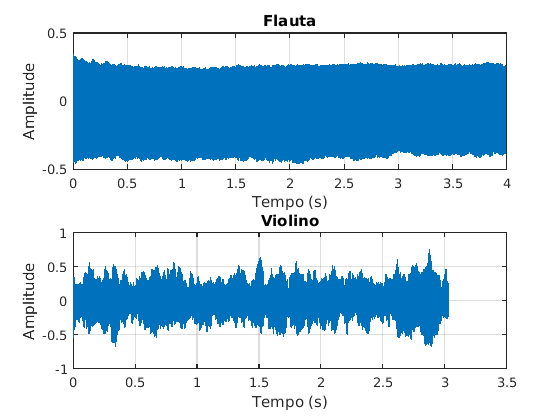

In [2]:
%%Plotagem dos audios:
dta = 1/dFa;                                                      % Tempo entre amostras
dta1 = 1/dFa1;
dTFinal = (length(vtSom)-1)*dta;                                  % Tempo da última amostra do sinal de áudio
dTFinal1 = (length(vtSom1)-1)*dta1; 
vtTSom = 0:dta:dTFinal;
vtTSom1 = 0:dta1:dTFinal1;                                        % Eixo temporal do arquivo de áudio
figure(1)
subplot(2,1,1)
plot(vtTSom,vtSom);                                               % Plota gráfico do áudio
xlabel('Tempo (s)');
ylabel ('Amplitude');
title('Flauta')
grid on;
subplot(2,1,2)
plot(vtTSom1,vtSom1);                                               % Plota gráfico do áudio
xlabel('Tempo (s)');
ylabel ('Amplitude');
title('Violino')
grid on;

__Pela visualização dos gráficos temporais, é possível observar que o som da flauta é mais uniforme, enquanto que o do violino possui mais variações abrutas. Provavelmente, quando formos observar as componentes frequenciais, o espectro do som do violino possuirá mais componenes__

Tempo da DFT = 0.000284 s


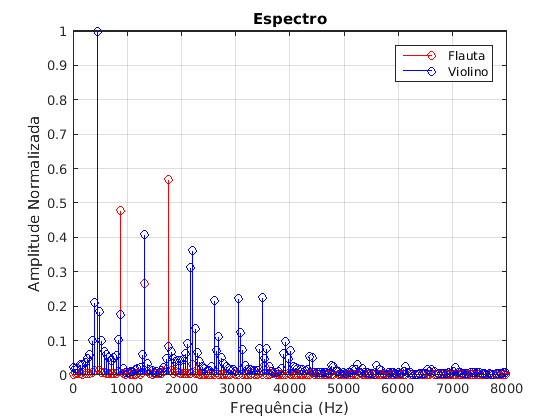

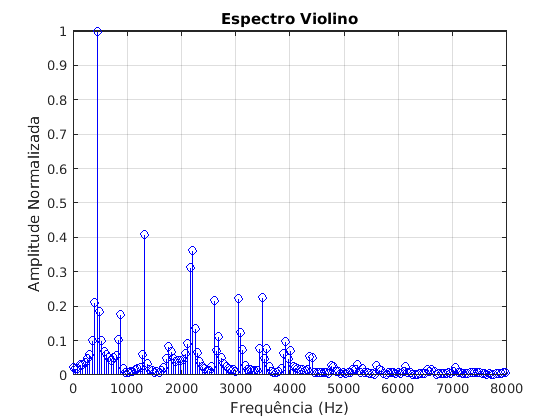

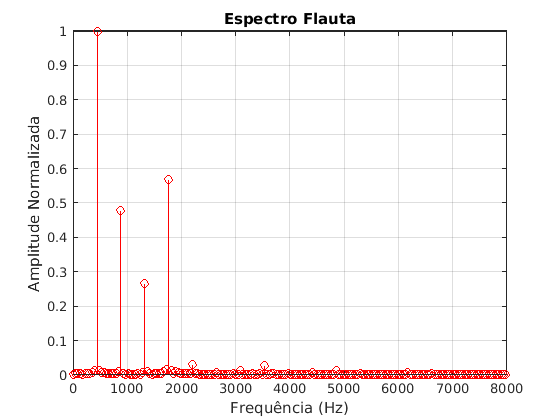

In [22]:
t1=tic;
%Trabalhando o espectro
lfft=1000;
%Construção do Single-sided amplitude spectrum
yfft=fft(vtSom,lfft);                                          %Utilizando a função built-in
yfft1=fft(vtSom1,lfft);
freq=[0:dFa/lfft:dFa/2-dFa/lfft];
freq1=[0:dFa1/lfft:dFa1/2-dFa1/lfft];
yfftuni = abs(yfft(1:lfft/2));
yfftuni1 = abs(yfft1(1:lfft/2));
tempo_DFT=toc(t1);                                    % Conta tempo de execução até esse ponto do código
disp(['Tempo da DFT = ' num2str(tempo_DFT) ' s']);    % Mostra tempo de execução
figure(1);
eixo_x=[freq,freq1];
eixo_y=[yfftuni'/max(yfftuni),yfftuni1'/max(yfftuni1)];
figure(1);
stem(freq,(yfftuni/max(yfftuni)),'r');
title('Espectro Flauta');
xlabel('Frequência (Hz)');
ylabel('Amplitude Normalizada');
axis([0 8000 0 1]);
grid on;
figure(2);
stem(freq1,(yfftuni1)/max(yfftuni1),'b');
%legend('Flauta','Violino')
title('Espectro Violino');
xlabel('Frequência (Hz)');
ylabel('Amplitude Normalizada');
grid on;
axis([0 8000 0 1]);
figure(3)
stem(freq,(yfftuni/max(yfftuni)),'r');
hold on
stem(freq1,(yfftuni1)/max(yfftuni1),'b');
title('Espectro');
xlabel('Frequência (Hz)');
ylabel('Amplitude Normalizada');
legend('Flauta','Violino');
grid on;
axis([0 8000 0 1]);
%%

__Como esperado, o sinal da flauta é mais 'limpo' que o do violino. Enquanto que o espectro da flauta possui componentes significativas em apenas 4 frequências, o espectro do violino é bem mais vasto. Além disso, podemos ver que a componente de maior intensidade, para os dois instrumentos, está na mesma porção do espectro, antes dos 1000 Hz__

__Em Python, temos a seguinte implementação__

In [1]:
#-----------------------IMPORTACOES E DEFINICOES GLOBAIS----------------------------
soundFile = '../../DCO2004_2019/MATERIAL/HD_03_MATLAB/Flauta.wav'               # Especifica do local e nome do arquivo de áudio
soundFile1 = '../../DCO2004_2019/MATERIAL/HD_03_MATLAB/Violino.wav'

import numpy as np
import scipy.io.wavfile as wv 
import matplotlib.pyplot as plt
import os
import time

__Visualização dos sinais no tempo__

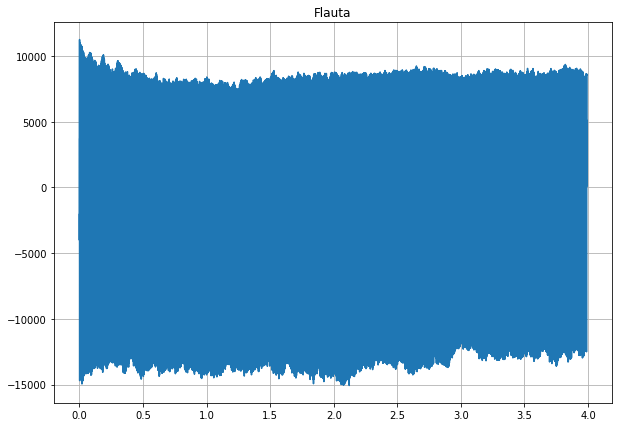

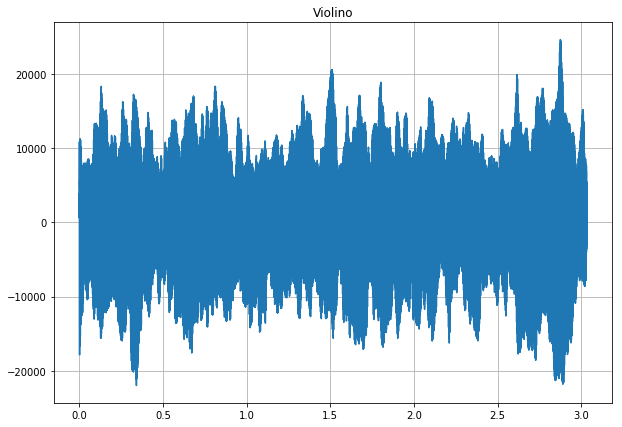

In [2]:
#----------------------------//-----------------------------------------------
dFa,vtSom = wv.read(soundFile) 
dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio
plt.grid(True)
plt.title('Flauta')

dFa1,vtSom1= wv.read(soundFile1)
dta1=1/dFa1
dTFinal1 = (len(vtSom1)-1)*dta1
vtTSom1 = np.arange(0,dTFinal1+dta1,dta1)
plt.figure(2,[10,7])
plt.plot(vtTSom1,vtSom1)
plt.grid(True)
plt.title('Violino')

plt.show()

           

Tempo da DFT =  0.0035120000000006257 s


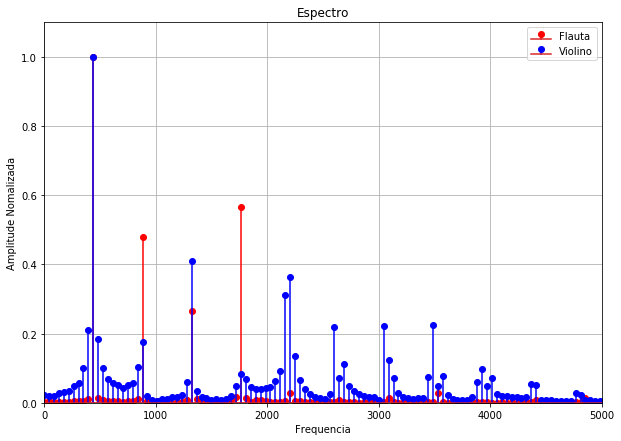

In [4]:
#Analise frequencial
t1=time.clock()    
lfft = 1000
yfft = np.fft.fft(vtSom,lfft)/lfft  
yfft1 = np.fft.fft(vtSom1,lfft)/lfft   
freq = np.arange(0,dFa/2,dFa/lfft)                             # Definição do eixo das frequências unilateral
freq1 = np.arange(0,dFa1/2,dFa1/lfft)                             # Definição do eixo das frequências unilateral
yfftuni = np.abs(yfft[0:lfft//2])  
yfftuni1 = np.abs(yfft1[0:lfft//2])                                  # Coleta da FFT unilateral
tempo_DFT=time.clock() - t1  
print('Tempo da DFT = ',tempo_DFT,'s')               # Mostra tempo de execução
plt.figure(3,[10,7])
plt.stem(freq,(yfftuni)/max(yfftuni),'r',markerfmt='ro')                              # Plotagem do espectro unilateral M(f)
plt.stem(freq1,yfftuni1/max(yfftuni1),'b',markerfmt='bo')
plt.title('Espectro')                             # Configuração do título do gráfico 
plt.xlabel('Frequencia')                               # Configuração do eixo x do gráfico 
plt.ylabel('Amplitude Nomalizada')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([0,5000,0,1.1])                                      # Zoom do gráfico
plt.legend(['Flauta','Violino'])
plt.show()

__A figura acima mostra o espectro dos dois instrumentos sobrepostos. A raia da componente principal dos dois sinais aparentemente é coincidente, ao ponto de vermos apenas uma raia na cor azul. Pode-se ver mais uma vez que o espectro do sinal da flauta é mais limpo que o do violino. Outro ponto a atentar é o tempo de execução do algoritmo para cada plataforma.__